In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/logistic-regression'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-regression/Social_Network_Ads.csv


### ADDING DATA FOR LOGISTIC REGRESSION


In [14]:
data=pd.read_csv("/kaggle/input/logistic-regression/Social_Network_Ads.csv")


In [15]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [16]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
data=data.drop(["User ID"],axis=1)

In [20]:
data_enc=pd.get_dummies(data,columns=["Gender"],dtype="int")

In [22]:
data_enc.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [23]:
data_enc=data_enc.drop(["Gender_Male"],axis=1)

In [24]:
data_enc.head()

,Age,EstimatedSalary,Purchased,Gender_Female
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


In [26]:
data_enc.corr()

,Age,EstimatedSalary,Purchased,Gender_Female
Age,1.000000,0.155238,0.622454,0.073741
EstimatedSalary,0.155238,1.000000,0.362083,0.060435
Purchased,0.622454,0.362083,1.000000,0.042469
Gender_Female,0.073741,0.060435,0.042469,1.000000


In [31]:
x=data_enc[["Age","EstimatedSalary","Gender_Female"]]
y=data_enc[["Purchased"]]

<Axes: xlabel='Age'>

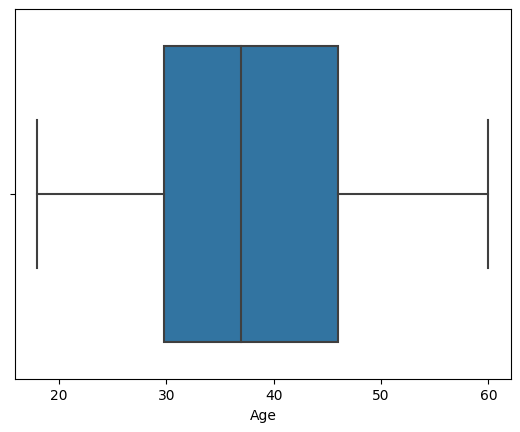

In [47]:
import seaborn as sns
import matplotlib as plt
sns.boxplot(x=x["Age"])

<Axes: xlabel='EstimatedSalary'>

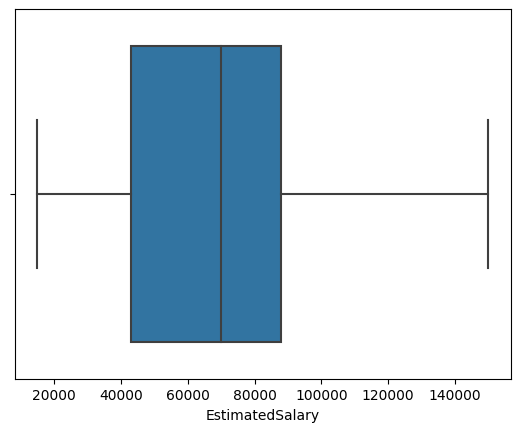

In [33]:
import seaborn as sns
sns.boxplot(x=x["EstimatedSalary"])

In [36]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scale=scale.fit_transform(x)

In [41]:
y=y.values.ravel()

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scale,y,test_size=0.3,random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain.ravel())

LogisticRegression()

In [44]:
ypred=model.predict(xtest)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy :-",accuracy_score(ypred,ytest))
print("Confusion :-",confusion_matrix(ypred,ytest))
print("Classification :-",classification_report(ypred,ytest))

accuracy :- 0.8583333333333333
Confusion :- [[71 15]
 [ 2 32]]
Classification :-               precision    recall  f1-score   support

           0       0.97      0.83      0.89        86
           1       0.68      0.94      0.79        34

    accuracy                           0.86       120
   macro avg       0.83      0.88      0.84       120
weighted avg       0.89      0.86      0.86       120



In [50]:
from xgboost import XGBClassifier
model_xg=XGBClassifier()
model_xg.fit(xtrain,ytrain)
y_pred=model_xg.predict(xtest)

In [52]:
print("accuracy :-",accuracy_score(y_pred,ytest))
print("Confusion :-",confusion_matrix(y_pred,ytest))
print("Classification :-",classification_report(y_pred,ytest))

accuracy :- 0.8666666666666667
Confusion :- [[67 10]
 [ 6 37]]
Classification :-               precision    recall  f1-score   support

           0       0.92      0.87      0.89        77
           1       0.79      0.86      0.82        43

    accuracy                           0.87       120
   macro avg       0.85      0.87      0.86       120
weighted avg       0.87      0.87      0.87       120

